In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr 

import MJO_E3SM_util as mjo 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
lelmin = []
lelmax = []
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'

for case_dir in ['control','FIX_QRT','GBL_QRT']:
    ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all.nc')
    data = np.log10(ds_wk0['sym'].sel(wavenumber=slice(-15,15), frequency=slice(None, 0.5)).values)
    lelmin.append(np.nanmin(data))
    lelmax.append(np.nanmax(data))

print(np.min(lelmin))
print(np.max(lelmax))


-1.002375949543744
2.3189861308849866


In [48]:
lelmin = []
lelmax = []
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'

for case_dir in ['control','FIX_QRT','GBL_QRT']:
    ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all_seg200days.nc')
    data = np.log10(ds_wk0['sym'].sel(wavenumber=slice(-15,15), frequency=slice(None, 0.5)).values)
    lelmin.append(np.nanmin(data))
    lelmax.append(np.nanmax(data))

print(np.min(lelmin))
print(np.max(lelmax))


-1.3249316118125414
2.5520803945285304


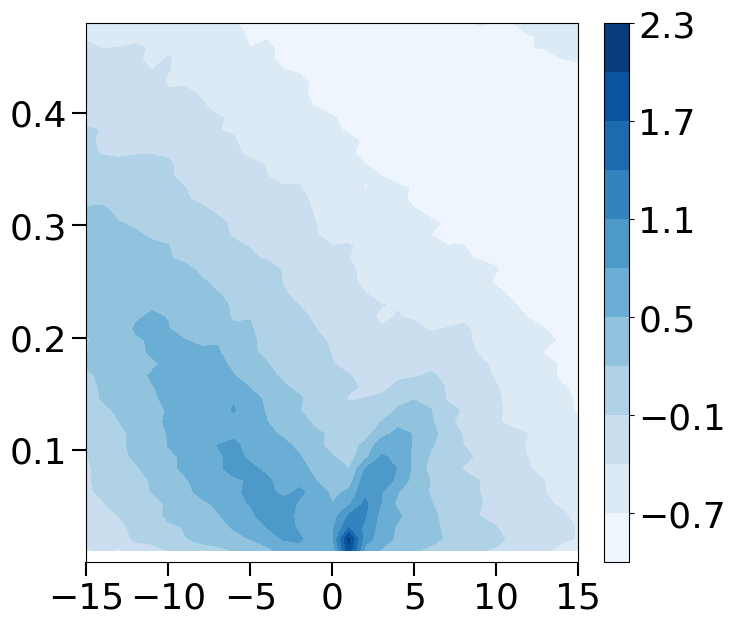

In [58]:
# directory that stores all case data
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'
# specify which case we use
case_dir = 'control'
ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all.nc')
mjo.wk_plot_sym(ds_wk0['sym'],logflg=True, pltDispCurve=False, savflg=True, filename='OLR_WK_raw_96dayseg_'+case_dir+'.png', vmin=-1.0, vmax=2.3)

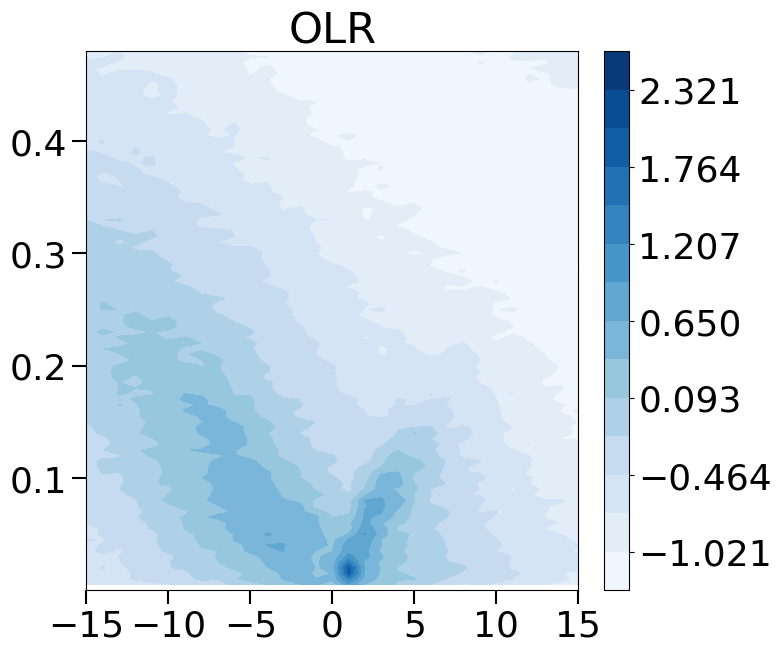

In [41]:
# directory that stores all case data
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'
# specify which case we use
case_dir = 'control'
ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all_seg200days.nc')
mjo.wk_plot_sym(ds_wk0['sym'],tlt='OLR', logflg=True, pltDispCurve=False, savflg=True, filename='OLR_WK_raw_200dayseg_'+case_dir+'.png', vmin=-1.3, vmax=2.6)

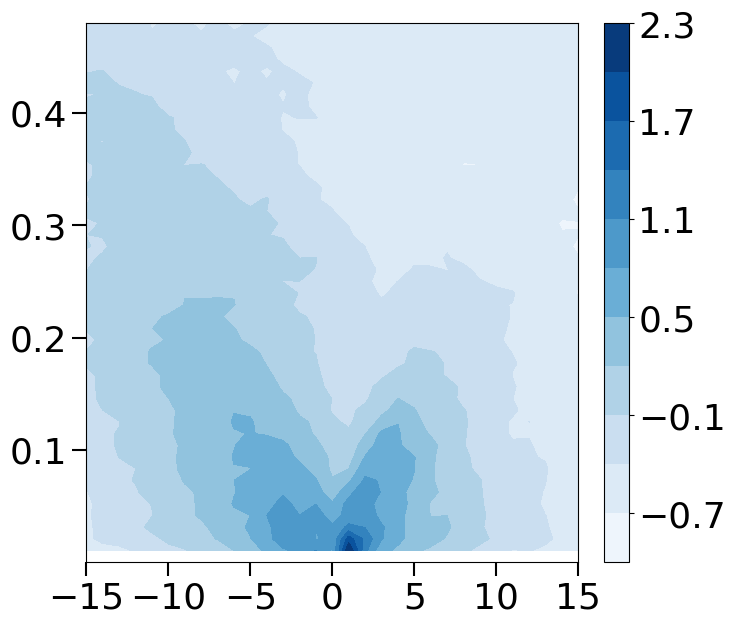

In [59]:
# directory that stores all case data
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'
# specify which case we use
case_dir = 'FIX_QRT'
ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all.nc')
mjo.wk_plot_sym(ds_wk0['sym'],logflg=True, pltDispCurve=False, savflg=True, filename='OLR_WK_raw_96dayseg_'+case_dir+'.png', vmin=-1.0, vmax=2.3)

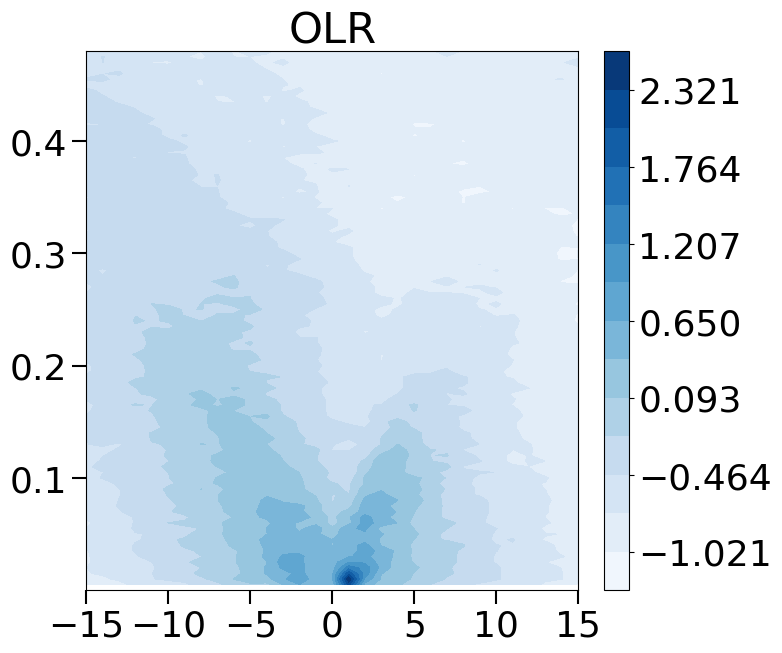

In [43]:
# directory that stores all case data
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'
# specify which case we use
case_dir = 'FIX_QRT'
ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all_seg200days.nc')
mjo.wk_plot_sym(ds_wk0['sym'],tlt='OLR', logflg=True, pltDispCurve=False, savflg=True, filename='OLR_WK_raw_200dayseg_'+case_dir+'.png', vmin=-1.3, vmax=2.6)

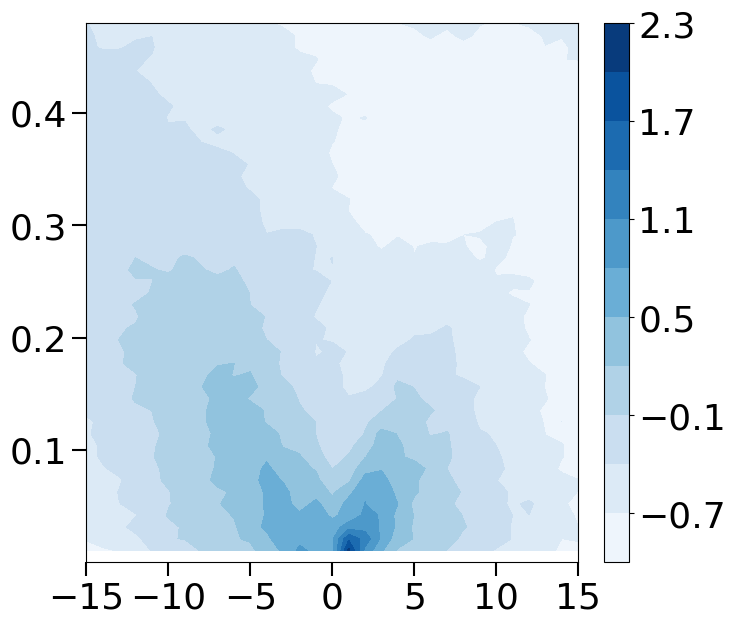

In [60]:
# directory that stores all case data
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'
# specify which case we use
case_dir = 'GBL_QRT'
ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all.nc')
mjo.wk_plot_sym(ds_wk0['sym'], logflg=True, pltDispCurve=False, savflg=True, filename='OLR_WK_raw_96dayseg_'+case_dir+'.png', vmin=-1.0, vmax=2.3)

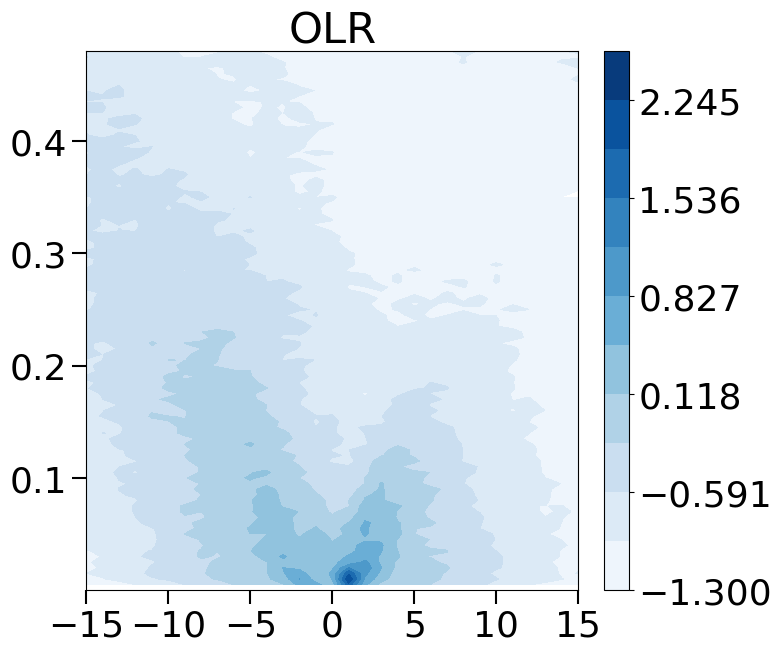

In [57]:
# directory that stores all case data
dirn = '/global/cfs/cdirs/m3312/linyao/MJO_E3SM_data/regridded_data/'
# specify which case we use
case_dir = 'GBL_QRT'
ds_wk0 = xr.open_dataset(dirn + '/analysis/' + case_dir + '_OLR_wk_dailyinput_all_seg200days.nc')
mjo.wk_plot_sym(ds_wk0['sym'],tlt='OLR', logflg=True, pltDispCurve=False, savflg=True, filename='OLR_WK_raw_200dayseg_'+case_dir+'.png', vmin=-1.3, vmax=2.6)

In [8]:
import numpy as np 
import xarray as xr

fn ='/pscratch/sd/l/linyaoly/ERA5/reanalysis/rmm/full/RMM_ERA5_daily_1979to2012.nc'

FFmjo = xr.open_dataset(fn)
FFmjo_sel = FFmjo.sel(time=slice(str(2019)+'-01-01', str(2020-1)+'-12-31'))
FFmjo_sel.fillna(0)
pc = np.asarray(FFmjo_sel['RMM'])

# calculate the initial amplitude
amp = np.sqrt(pc[:,0]**2 + pc[:,1]**2)
# assign the initial amplitude to the dataset
FFmjo_sel['amp'] = (('time'), amp)
# select the time steps where the intial amplitude is larger than 1.0
FFmjo_sel_1 = FFmjo_sel.where(FFmjo_sel.amp >= 1.0, drop=True)
# get the time steps
time_sel = FFmjo_sel_1.time.values

FFmjo_sel_1

<xarray.Dataset>
Dimensions:    (time: 225, mode: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-29
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 347 348 349 359 360 361 362 363
  * mode       (mode) int64 0 1
Data variables:
    RMM        (time, mode) float64 2.227 0.4801 1.593 ... 1.046 -0.0592 1.103
    amp        (time) float64 2.278 1.749 1.604 1.882 ... 1.282 1.078 1.105

In [9]:
time_sel

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-18T00:00:00.000000000', '2019-01-19T00:00:00.000000000',
       '2019-01-20T00:00:00.000000000', '2019-01-21T00:00:00.000000000',
       '2019-01-22T00:00:00.000000000', '2019-01-23T00:00:00.000000000',
       '2019-01-24T00:00:00.000000000', '2019-01-25T00:00:00.000000000',
       '2019-01-26T00:00:00.000000000', '2019-01-27T00:00:00.000000000',
       '2019-01-28T00:00:00.000000000', '2019-01-29T00:00:00.000000000',
       '2019-01-30T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-02-02T00:00:00.000000000',
       '2019-02-03T00:00:00.000000000', '2019-02-04

In [10]:
# select the time steps in the original dataset
ds_sel = FFmjo.sel(time=time_sel)
ds_sel

<xarray.Dataset>
Dimensions:    (time: 225, mode: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-12-29
    dayofyear  (time) int64 ...
  * mode       (mode) int64 0 1
Data variables:
    RMM        (time, mode) float64 ...

In [15]:
time_forecast = time_sel + np.timedelta64(0,'D')

time_forecast

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-18T00:00:00.000000000', '2019-01-19T00:00:00.000000000',
       '2019-01-20T00:00:00.000000000', '2019-01-21T00:00:00.000000000',
       '2019-01-22T00:00:00.000000000', '2019-01-23T00:00:00.000000000',
       '2019-01-24T00:00:00.000000000', '2019-01-25T00:00:00.000000000',
       '2019-01-26T00:00:00.000000000', '2019-01-27T00:00:00.000000000',
       '2019-01-28T00:00:00.000000000', '2019-01-29T00:00:00.000000000',
       '2019-01-30T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-02-02T00:00:00.000000000',
       '2019-02-03T00:00:00.000000000', '2019-02-04

In [2]:
pc = np.asarray(ds['RMM'])
pc.shape

(16161, 2)

In [3]:
amp0 = np.sqrt(pc[:,0]**2 + pc[:,1]**2)
amp0

array([1.64145578, 1.86201176, 2.19493016, ..., 0.48759126, 0.44410121,
       0.47030073])

In [4]:
ds['amp'] = (('time'), amp0)

In [5]:
ds 

<xarray.Dataset>
Dimensions:    (time: 16161, mode: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2023-03-31
    dayofyear  (time) int64 ...
  * mode       (mode) int64 0 1
Data variables:
    RMM        (time, mode) float64 0.9067 1.368 0.8406 ... 0.3869 -0.2674
    amp        (time) float64 1.641 1.862 2.195 2.142 ... 0.4876 0.4441 0.4703